# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_retail = pd.read_csv("online_retail_II (1).csv")

In [ ]:
data_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
11722,490323,79190B,RETRO PLASTIC POLKA TRAY,3,2009-12-04 15:27:00,0.42,14087.0,United Kingdom
11723,490323,21990,MODERN FLORAL STATIONERY SET,1,2009-12-04 15:27:00,2.95,14087.0,United Kingdom
11724,490323,22088,PAPER BUNTING COLOURED LACE,1,2009-12-04 15:27:00,2.95,14087.0,United Kingdom
11725,490323,22087,PAPER BUNTING WHITE LACE,1,2009-12-04 15:27:00,2.95,14087.0,United Kingdom


In [ ]:
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11727 entries, 0 to 11726
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      11727 non-null  object 
 1   StockCode    11727 non-null  object 
 2   Description  11709 non-null  object 
 3   Quantity     11727 non-null  int64  
 4   InvoiceDate  11727 non-null  object 
 5   Price        11727 non-null  float64
 6   Customer ID  8679 non-null   float64
 7   Country      11726 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 733.1+ KB


### Create New Feature: Year

#Membuat kolom baru dengan nama Year yang berisi nilai tahun dari Invoice Date
-	Ubah tipe data kolom InvoiceDate menjadi tipe ‘datetime’


In [ ]:
data_retail.InvoiceDate = pd.DatetimeIndex(data_retail.InvoiceDate) #merunah type data Inoivedate menjadi datetime dgn syntak disamping
data_retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

#Membuat column baru dengan nama years


-	Gunakan function dari library pandas untuk mendapatkan tahun dari kolom InvoiceDate
DatetimeIndex(data['InvoiceDate']).year


In [ ]:
data_retail['Years'] = pd.DatetimeIndex(data_retail.InvoiceDate).year   #MEMBUAT COLUMN BARU DENGAN NAMA YEARS 

data_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
11722,490323,79190B,RETRO PLASTIC POLKA TRAY,3,2009-12-04 15:27:00,0.42,14087.0,United Kingdom,2009
11723,490323,21990,MODERN FLORAL STATIONERY SET,1,2009-12-04 15:27:00,2.95,14087.0,United Kingdom,2009
11724,490323,22088,PAPER BUNTING COLOURED LACE,1,2009-12-04 15:27:00,2.95,14087.0,United Kingdom,2009
11725,490323,22087,PAPER BUNTING WHITE LACE,1,2009-12-04 15:27:00,2.95,14087.0,United Kingdom,2009


### Filtering Data

#Membuat filtering data dengan ketentuan di bawah ini dan simpan dalam variabel baru, misalnya sales
-	Quantity minimal 1 (tidak boleh 0 dan minus)


In [ ]:
data_retail[data_retail["Quantity"] > 1]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
11713,490323,85216,ASSORTED CAKES FRIDGE MAGNETS,6,2009-12-04 15:27:00,0.65,14087.0,United Kingdom,2009
11714,490323,79190D,RETRO PLASTIC DAISY TRAY,2,2009-12-04 15:27:00,0.42,14087.0,United Kingdom,2009
11715,490323,79190A,RETRO PLASTIC 70'S TRAY,2,2009-12-04 15:27:00,0.42,14087.0,United Kingdom,2009
11721,490323,79191C,RETRO PLASTIC ELEPHANT TRAY,4,2009-12-04 15:27:00,0.85,14087.0,United Kingdom,2009


In [ ]:
cape = data_retail['Quantity'] > 0    #cara atas bawah sama saja rumus fuilternya
data_retail[cape].sample(10) 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years
93,489441,22138,BAKING SET 9 PIECE RETROSPOT,6,2009-12-01 09:44:00,4.25,18087.0,United Kingdom,2009
5007,489856,84534B,FAIRY CAKE NOTEBOOK A5 SIZE,1,2009-12-02 14:36:00,1.70,NaN,United Kingdom,2009
10559,490209,21590,KINGS CHOICE CIGAR BOX MATCHES,144,2009-12-04 12:06:00,1.06,17389.0,United Kingdom,2009
8557,490085,21733,RED HANGING HEART T-LIGHT HOLDER,5,2009-12-03 15:43:00,2.95,12937.0,United Kingdom,2009
2938,489640,15034,PAPER POCKET TRAVELING FAN,2,2009-12-01 16:17:00,0.14,17345.0,United Kingdom,2009
6252,489877,84949,SILVER HANGING T-LIGHT HOLDER,96,2009-12-02 15:44:00,1.45,13089.0,United Kingdom,2009
10166,490149,22064,PINK DOUGHNUT TRINKET POT,1,2009-12-04 09:43:00,3.43,NaN,United Kingdom,2009
6682,489912,22271,FELTCRAFT DOLL ROSIE,6,2009-12-03 10:26:00,2.95,13931.0,United Kingdom,2009
6968,490008,21450,DISTRESSED CANDLE STICK WHITE,2,2009-12-03 12:10:00,5.95,15768.0,United Kingdom,2009
6858,490004,79323P,PINK CHERRY LIGHTS,24,2009-12-03 11:53:00,5.45,14051.0,United Kingdom,2009


-	Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan

In [ ]:
data_retail2 = data_retail[~data_retail['Invoice'].str.contains('C', na=False)]   #Cara atas bawa sama aja mencari ayng tidak mengandung C
data_retail2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [ ]:
lia = data_retail['Invoice'].apply(lambda x:x.find('C')) == -1    #Cara atas bawa sama aja mencari ayng tidak mengandung C

data_retail[lia].shape[0]

11536

# Filter dari nama table 

In [ ]:
data_filter = data_retail[cape & lia] #BERARTI INI  DIFOLDER DATA_RETAIL/DATA UTAMA ADA FILE YANG BERISI FILE CAPE DAN FILE LIA, LALU FOLDER DATA_RETAIL DIBUAT FOLDER LAGI DENGAN NAMA DATA_FILTER
data_filter.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years
11602,490312,84510F,SET OF 4 NEW ENGLAND COASTERS,1,2009-12-04 15:16:00,1.25,17961.0,United Kingdom,2009
8040,490074,21918,SET 12 KIDS COLOUR CHALK STICKS,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom,2009
1154,489552,22111,SCOTTIE DOG HOT WATER BOTTLE,8,2009-12-01 12:36:00,4.95,17063.0,United Kingdom,2009
5814,489857,21823,PAINTED METAL HEART WITH HOLLY BELL,1,2009-12-02 14:43:00,3.04,NaN,United Kingdom,2009
1479,489572,21928,JUMBO BAG SCANDINAVIAN PAISLEY,2,2009-12-01 13:29:00,1.95,17611.0,United Kingdom,2009
268,489465,21711,FOLDING UMBRELLA WHITE/RED SPOT,12,2009-12-01 10:52:00,4.95,13767.0,United Kingdom,2009
1436,489571,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2009-12-01 13:29:00,1.95,15967.0,United Kingdom,2009
1723,489580,21212,PACK OF 72 RETRO SPOT CAKE CASES,24,2009-12-01 13:43:00,0.55,12921.0,United Kingdom,2009
984,489545,22081,RIBBON REEL FLORA + FAUNA,1,2009-12-01 12:22:00,1.65,17804.0,United Kingdom,2009
3019,489645,48188,DOOR MAT WELCOME PUPPIES,3,2009-12-01 16:34:00,6.75,17191.0,United Kingdom,2009


### Create New Feature: Revenue

In [ ]:
data_filter['Revenue'] = data_filter.Quantity * data_filter.Price   #SINTAKS PENAMABHAN COLUMN DENGAN MENGAKLIKAN COLUMN QUANTITY DENGAN PRICE 
                                                                      #MENGUNNAKAN TABEL DATA_FILTER KARENA HASIL TABEL TERSEBUT HASIL DARI FILTER TABEL LIA DAN CAPE, MAKANYA MENGGUNAKAN TABEL DATA_FILTER
data_filter.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years,Revenue
1768,489590,22113,GREY HEART HOT WATER BOTTLE,7,2009-12-01 14:14:00,3.45,13110.0,United Kingdom,2009,24.15
2452,489599,85199L,LARGE HANGING IVORY & RED WOOD BIRD,24,2009-12-01 14:40:00,0.65,12758.0,Portugal,2009,15.60
431,489519,90067A,PINK VINTAGE VICTORIAN EARRINGS,6,2009-12-01 11:37:00,2.95,17700.0,United Kingdom,2009,17.70
7378,490024,47591B,SCOTTIES DES CHILD'S APRON,1,2009-12-03 12:40:00,1.65,14606.0,United Kingdom,2009,1.65
3527,489702,21086,SET/6 RED SPOTTY PAPER CUPS,48,2009-12-02 10:52:00,0.65,17511.0,United Kingdom,2009,31.20
643,489529,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,2009-12-01 11:51:00,2.95,17984.0,United Kingdom,2009,2.95
6371,489880,84270,ASSTD DESIGN BUBBLE GUM RING,30,2009-12-02 16:18:00,0.21,13313.0,United Kingdom,2009,6.30
2575,489602,21258,VICTORIAN SEWING BOX LARGE,3,2009-12-01 14:45:00,26.04,NaN,United Kingdom,2009,78.12
6128,489872,10135,COLOURING PENCILS BROWN TUBE,20,2009-12-02 15:28:00,1.25,15615.0,United Kingdom,2009,25.00
4286,489805,21490,SET OF THREE 50'S GIFT WRAPS,2,2009-12-02 12:39:00,1.95,17377.0,United Kingdom,2009,3.90


### Average of Revenue per Year

#Rata-rata tahun

In [ ]:
 data_filter[["Years", "Revenue"]].groupby('Years').mean() 


,Revenue
Years,
2009,19.794863


#Membuat visualisasi rata-rata tahun

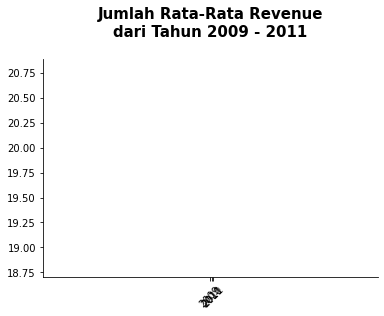

In [ ]:
plt.plot(data_filter[["Years", "Revenue"]].groupby('Years').mean()) 

plt.gca().set_title('Jumlah Rata-Rata Revenue\ndari Tahun 2009 - 2011\n',
                                    fontsize=15,fontweight="bold")
gap = 0.1
plt.gca().spines['top'].set_visible(False) #sintaks untuk mengahpus garis atas pada grafik
plt.gca().spines['right'].set_visible(False)##sintaks untuk mengahpus garis kanan pada grafik

garis = plt.gca().xaxis.get_ticklabels()# membuat variabel agar tulisan pada tahun menjadi keliatan bagus

plt.gca().set_xticks([2009,2010,2011]) #sintak membuat colmn tahun menjadi keliatan bagus
plt.setp(garis,rotation=45)#pelengkap
plt.show() #pelengkap

## Section 2

#Melakukan filtering menggunakan data sales (data yang sudah di filter pada section 1) dengan ketentuan CustomerID tidak boleh kosong atau null. Kemudian simpan dalam variabel finishe

In [ ]:
data_notnul = data_filter["Customer ID"].notnull() #DI FOLDER DATA_FILTER ADA FILE BARU BERNAMA DATA_NOTNUL. KEANPA DIMANAMAKAN FILE KARENA ADA SINTAKS YANG DILAKAUKAN DATA_NOTNUL YAITU ["Customer ID"].notnull()
data_finished= data_filter[data_notnul] #DIFOLDER DATA_FILTER DIBUATT FOLDER DATA FINISHED
data_finished.sample(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years,Revenue
9216,490124,21485,RED SPOT HEART HOT WATER BOTTLE,1,2009-12-03 18:08:00,4.95,16791.0,United Kingdom,2009,4.95
8852,490099,47562,ENGLISH ROSE IRONING BOARD COVER,5,2009-12-03 16:12:00,3.75,16736.0,United Kingdom,2009,18.75
8633,490090,22114,HOT WATER BOTTLE TEA AND SYMPATHY,1,2009-12-03 15:53:00,3.95,15581.0,United Kingdom,2009,3.95
4430,489814,21916,SET 12 RETRO WHITE CHALK STICKS,6,2009-12-02 13:06:00,0.42,14669.0,United Kingdom,2009,2.52
8926,490100,21354,TOAST ITS - BEST MUM,2,2009-12-03 16:21:00,1.25,13001.0,United Kingdom,2009,2.50
4926,489855,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2009-12-02 14:34:00,3.75,16987.0,United Kingdom,2009,7.50
10238,490151,21185,HOME SWEET HOME BLACKBOARD,3,2009-12-04 09:49:00,6.35,16645.0,United Kingdom,2009,19.05
7739,490068,22350,CAT BOWL,12,2009-12-03 14:06:00,2.55,13085.0,United Kingdom,2009,30.60
8534,490083,37502,TEA TIME MUG IN GIFT BOX,4,2009-12-03 15:35:00,2.95,14031.0,United Kingdom,2009,11.80
1534,489573,84510A,SET OF 4 ENGLISH ROSE COASTERS,1,2009-12-01 13:29:00,1.25,15051.0,United Kingdom,2009,1.25


#Lakukan filtering data untuk mengelompokkan pelanggan yang membatalkan belanjanya, dengan cara mendeteksi kolom Invoice mengandung huruf ‘C’. Kemudian simpan dalam variabel baru bernama cancel.

In [ ]:
out_cancel = data_retail['Invoice'].apply(lambda x:x.find('C')) != -1 #DIFOLDER DATA_REATAIL ADA FILE BARU BERISI OUT_CANCEL
data_lia = data_retail["Customer ID"].notnull()                       #DIFOLDER DATA_REATAIL ADA FILE BARU BERISI DATA_LIA
data_cancel = data_retail[out_cancel & data_lia]                       #DIFOLDER DATA_RETAIL/DATA UTAMA YANG DIGABUNGKAN FILE  OUT_CANCEL DAN DATA_LIA DIMASUKAN KE DATA_CANCEL
data_cancel


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Years
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
10840,C490283,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,2009-12-04 12:49:00,1.25,12349.0,Italy,2009
10841,C490283,20747,PICCADILLY TEA SET,-1,2009-12-04 12:49:00,14.95,12349.0,Italy,2009
11194,C490296,POST,POSTAGE,-1,2009-12-04 13:51:00,28.00,12510.0,Spain,2009
11552,C490306,21989,PACK OF 20 SKULL PAPER NAPKINS,-36,2009-12-04 14:40:00,0.85,17193.0,United Kingdom,2009


#Hitung jumlah transaksi yang berhasil (dari variabel finished) dan jumlah transaksi yang dibatalkan (dari variabel cancel) untuk setiap tahunnya.

In [ ]:
#HITUNG JUMLAH TRANSAKSI YANG BERHASIL 
data_transaksi = data_finished.groupby("Years").count()['Invoice'] #DIFOLDER DATA_FINISHED ADA FILE DATA_TRANSAKSI 
data_transaksi

Years
2009     30761
2010    403094
2011    371765
Name: Invoice, dtype: int64

In [ ]:
#HITUNG  JUMLAH TRANSAKSI YANG MEMBATALKAN PESANAN
data_batal_transaksi = data_cancel.groupby("Years").count()['Invoice']
data_batal_transaksi

Years
2009     999
2010    9530
2011    8215
Name: Invoice, dtype: int64

VISUALISASAI FILE TRANSAKSI

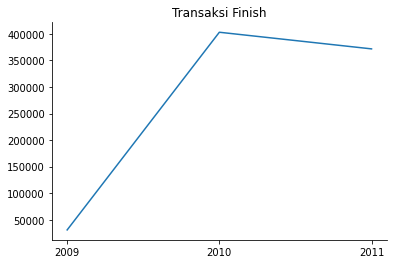

In [ ]:
plt.plot(data_transaksi) #pakai sintaks ini saja seharusnya udh bisa runing

plt.gca().set_title("Transaksi Finish") #SINTAKS UNTUK MEMBUAT JUDUL
plt.gca().spines['top'].set_visible(False) #sintaks untuk mengahpus garis atas pada grafik
plt.gca().spines['right'].set_visible(False)##sintaks untuk mengahpus garis kanan pada grafik

garis = plt.gca().xaxis.get_ticklabels()# membuat variabel agar tulisan pada tahun menjadi keliatan bagus

plt.gca().set_xticks([2009,2010,2011]) #sintak membuat colmn tahun menjadi keliatan bagus
plt.show() #pelengkap




VISUALISASI FILE CANCEL TRANSAKSI

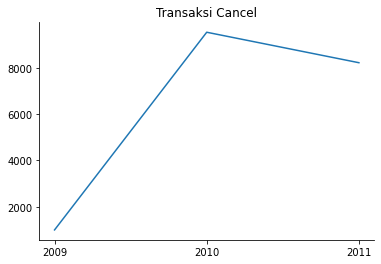

In [ ]:
plt.plot(data_batal_transaksi) #pakai sintaks ini saja seharusnya udh bisa runing

plt.gca().set_title("Transaksi Cancel") #SINTAKS UNTUK MEMBUAT JUDUL
plt.gca().spines['top'].set_visible(False) #sintaks untuk mengahpus garis atas pada grafik
plt.gca().spines['right'].set_visible(False)##sintaks untuk mengahpus garis kanan pada grafik

garis = plt.gca().xaxis.get_ticklabels()# membuat variabel agar tulisan pada tahun menjadi keliatan bagus

plt.gca().set_xticks([2009,2010,2011]) #sintak membuat colmn tahun menjadi keliatan bagus
plt.show() #pelengkap

#Hitung cancellation rate untuk setiap tahunnya.
Cancellation rate adalah persentase pelanggan yang melakukan pembatalan order yang telah dilakukan. Formulanya adalah jumlah customer yang cancel dibagi jumlah seluruh customer kemudian dikali 100%.


###Jumlah customer yang dicancel berdasarkan yang unik/tidak ada yang duplikat

In [ ]:
group_cancel = data_cancel.groupby(["Years", "Customer ID"]).count()["Invoice"]
year9 = group_cancel.loc[2009]
year10 = group_cancel.loc[2010]
year11 = group_cancel.loc[2011]
print(year9)

Customer ID
12349.0    5
12359.0    2
12424.0    4
12437.0    8
12439.0    3
          ..
18094.0    2
18223.0    5
18225.0    5
18252.0    1
18287.0    1
Name: Invoice, Length: 309, dtype: int64


###Jumlah Keseluruhan Customer

In [ ]:
data_retail_notnull = data_retail[data_retail["Customer ID"].notnull()]

group_all = data_retail_notnull.groupby(["Years", "Customer ID"]).count()["Invoice"]

year9_all = group_all.loc[2009]
year10_all = group_all.loc[2010]
year11_all = group_all.loc[2011]

year9_all.size

1045

#Cancellation dengan customer yang unik/tidak ada yang duplikat


In [ ]:
#. Formulanya adalah jumlah customer yang cancel dibagi jumlah seluruh customer kemudian dikali 100%.
rate9 = (year9.size/year9_all.size)*100
rate10 = (year10.size/year10_all.size)*100
rate11 = (year11.size/year11_all.size)*100
print(rate9)
print(rate10)
print(rate11)

29.569377990430624
40.33574259734204
35.20263901979265


###Jumlah customer yang dicancel berdasarkan yang duplikat/keseluruhan yang cancel

In [ ]:
group_cancel_dup = data_cancel.groupby("Years",).count()["Invoice"]

year9_dup = group_cancel_dup.loc[2009]
print(year9_dup)

year10_dup = group_cancel_dup.loc[2010]
print(year10_dup)

year11_dup = group_cancel_dup.loc[2010]
print(year11_dup)

group_cancel_dup.sum()

999
9530
9530


18744

###keseluruhan customer

In [ ]:
data_retail_notnull = data_retail[data_retail["Customer ID"].notnull()]

group_all_dup = data_retail_notnull.groupby("Years").count()["Invoice"]

year9_all_dup = group_all_dup.loc[2009]
year10_all_dup = group_all_dup.loc[2010]
year11_all_dup = group_all_dup.loc[2011]

group_all_dup.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Years
2009     31760
2010    412624
2011    379980
Name: Invoice, dtype: int64>

#Cancellation dengan customer yang duplikat

In [ ]:
rate9_cancel = (year9_dup/year9_all_dup)*100
rate10_cancel = (year10_dup/year10_all_dup)*100
rate11_cancel = (year11_dup/year11_all_dup)*100
print(rate9_cancel)
print(rate10_cancel)
print(rate11_cancel)

3.145465994962217
2.309608747915778
2.5080267382493813
